In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
titanic = pd.read_csv("data/titanic.csv")
titanic["age"] = titanic["age"].replace(["?"], [None]).astype("float")
titanic["fare"] = titanic["fare"].replace(["?"], [None]).astype("float")
titanic["survived"] = titanic["survived"].replace([0,1], ["deceased", "survived"])
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,deceased,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,deceased,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,deceased,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,deceased,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,?,C,?,328,?
1305,3,deceased,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,?,C,?,?,?
1306,3,deceased,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,?,C,?,304,?
1307,3,deceased,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,?,C,?,?,?


<AxesSubplot:title={'center':'Titanic Survival Rates by Total Population Broken Down by Gender'}>

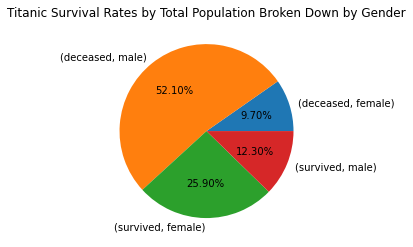

In [3]:
titanic[["survived", "sex"]].value_counts().sort_index().plot.pie(
    autopct = "%1.2f%%", 
    title = "Titanic Survival Rates by Total Population Broken Down by Gender",
    label = ""
)

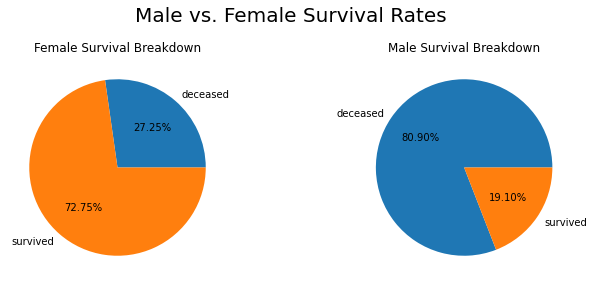

In [4]:
male = titanic[titanic["sex"] == "male"]
female = titanic[titanic["sex"] == "female"]
plt.figure(figsize = (10 , 4))
plt.suptitle("Male vs. Female Survival Rates", fontsize = 20)
plt.subplot(1,2,1)
female["survived"].value_counts().sort_index().plot.pie(
    autopct = "%1.2f%%", 
    title = "Female Survival Breakdown",
    label = ""
)
plt.subplot(1,2,2)
male["survived"].value_counts().sort_index().plot.pie(
    autopct = "%1.2f%%", 
    title = "Male Survival Breakdown",
    label = ""
)
plt.tight_layout()

<AxesSubplot:title={'center':'Passenger Breakdown by Age'}, ylabel='Frequency'>

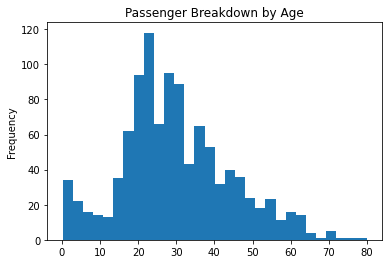

In [5]:
titanic["age"].plot.hist(bins = 30, title = "Passenger Breakdown by Age")

Text(0.5, 1.0, 'Passenge Breakdown by Age and Gender')

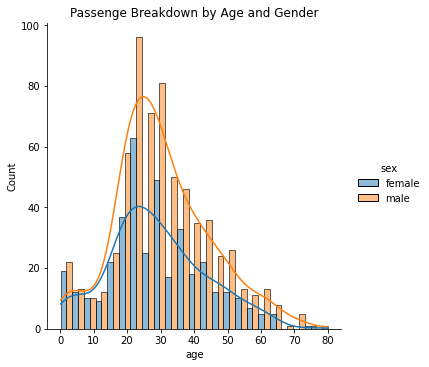

In [33]:
sns.displot(data = titanic, kind = "hist", x = "age", hue = "sex", multiple = "dodge", kde = True)
plt.title("Passenge Breakdown by Age and Gender")

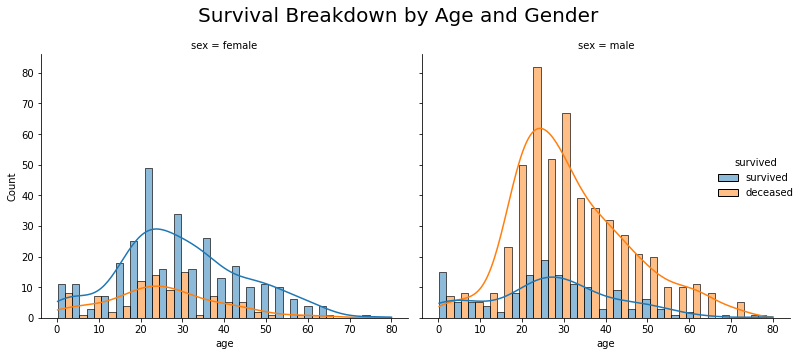

In [32]:
sns.displot(data = titanic, kind = "hist", x = "age", hue = "survived", col = "sex", multiple = "dodge", kde = True)
plt.suptitle("Survival Breakdown by Age and Gender", fontsize = 20)
plt.tight_layout()

In [8]:
def age_group(age):
    if age < 2:
        return "infant"
    elif age < 13:
        return "child"
    elif age < 20:
        return "teenager"
    elif age < 35:
        return "young adult"
    elif age < 60:
        return "adult"
    else: 
        return "senior"
    
titanic["age_class"] = titanic["age"].apply(age_group)

<AxesSubplot:title={'center':'Passenger Age Group Breakdown'}>

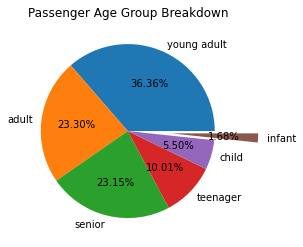

In [9]:
titanic["age_class"].value_counts().plot.pie(
    autopct = "%1.2f%%", 
    title = "Passenger Age Group Breakdown", 
    label = "",
    explode = (0,0,0,0,0, .5)
)

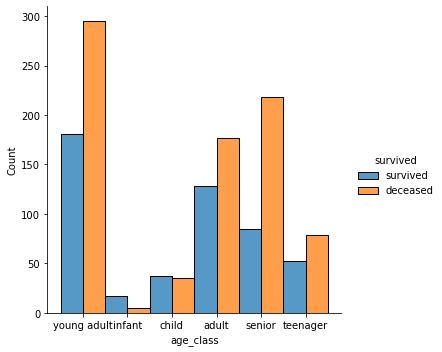

In [10]:
sns.displot(data = titanic, kind = "hist", x = "age_class", hue = "survived", multiple = "dodge", binwidth = .05)

In [11]:
titanic["famsize"] = titanic["sibsp"] + titanic["parch"]

In [12]:
titanic["famsize"].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: famsize, dtype: int64

In [13]:
titanic[titanic["famsize"] == 10]
### Members of the largest family (11) on board

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_class,famsize
1170,3,deceased,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,?,S,?,?,?,senior,10
1171,3,deceased,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,?,S,?,67,?,teenager,10
1172,3,deceased,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,?,S,?,?,?,senior,10
1173,3,deceased,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,?,S,?,?,?,senior,10
1174,3,deceased,"Sage, Miss. Dorothy Edith 'Dolly'",female,NaN,8,2,CA. 2343,69.55,?,S,?,?,?,senior,10
1175,3,deceased,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,?,S,?,?,?,senior,10
1176,3,deceased,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,?,S,?,?,?,senior,10
1177,3,deceased,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,?,S,?,?,?,senior,10
1178,3,deceased,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,?,S,?,?,?,senior,10
1179,3,deceased,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,?,S,?,?,?,senior,10


Text(0.5, 1.0, 'Survival Breakdown Based on Number of Family Members Aboard')

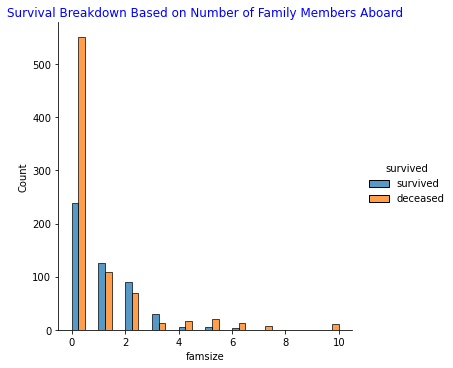

In [14]:
sns.displot(data = titanic, kind = "hist", x = "famsize", hue = "survived", multiple = "dodge", binwidth = .5)
plt.title("Survival Breakdown Based on Number of Family Members Aboard", fontsize = 12, color = "blue")

<AxesSubplot:ylabel='famsize'>

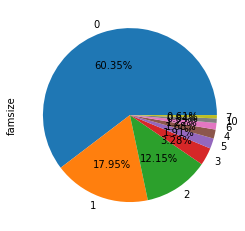

In [15]:
titanic["famsize"].value_counts().plot.pie(autopct = "%1.2f%%")

([<matplotlib.axis.XTick at 0x265c260a040>,
 [Text(0.5, 0, '0.5'), Text(1.0, 0, '1.0'), Text(1.5, 0, '1.5')])

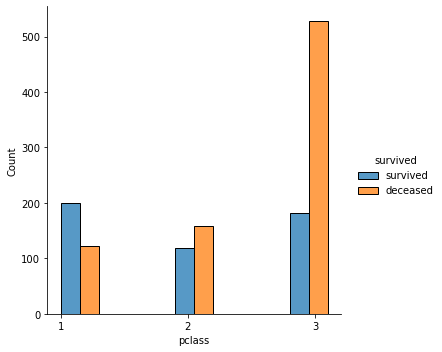

In [16]:
sns.displot(data = titanic, kind = "hist", x = "pclass", hue = "survived", multiple = "dodge", binwidth = .3)
plt.xticks([1,2,3])

In [17]:
titanic.fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [18]:
class1 = titanic[titanic["pclass"] == 1]
class2 = titanic[titanic["pclass"] == 2]
class3 = titanic[titanic["pclass"] == 3]

Text(0.5, 1.0, 'Total Passengers by Class')

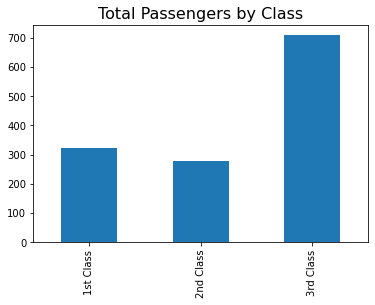

In [19]:
titanic["pclass"].value_counts().sort_index().plot(kind = "bar")
plt.xticks([0,1,2], ["1st Class", "2nd Class", "3rd Class"])
plt.title("Total Passengers by Class", fontsize = 16)

<AxesSubplot:title={'center':'3rd Class'}, ylabel='sex'>

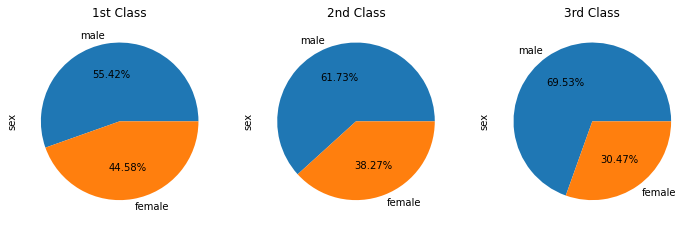

In [20]:
plt.figure(figsize = (12,4))
plt.subplot(1,3,1)
plt.title("1st Class")
class1["sex"].value_counts().plot(kind = "pie", autopct = "%1.2f%%")

plt.subplot(1,3,2)
plt.title("2nd Class")
class2["sex"].value_counts().plot(kind = "pie", autopct = "%1.2f%%")

plt.subplot(1,3,3)
plt.title("3rd Class")
class3["sex"].value_counts().plot(kind = "pie", autopct = "%1.2f%%")

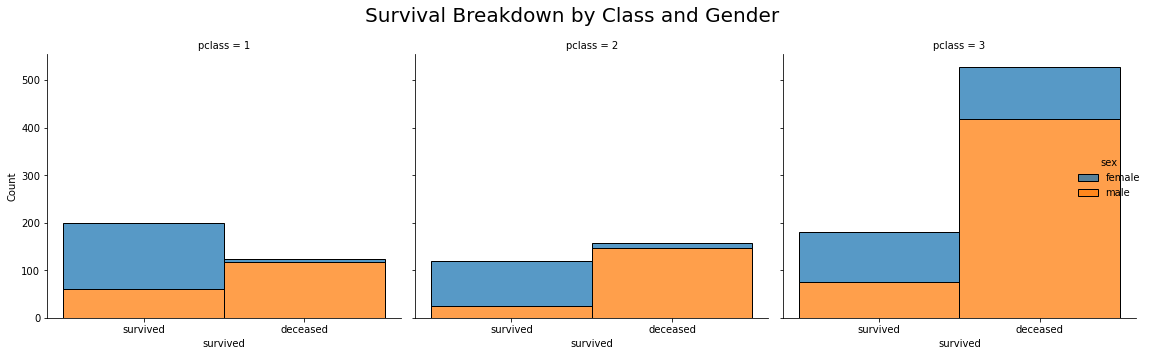

In [21]:
sns.displot(data = titanic, kind = "hist", x = "survived", hue = "sex", col = "pclass", multiple = "stack")
plt.suptitle("Survival Breakdown by Class and Gender", fontsize = 20)
plt.tight_layout()

In [22]:
class1["fare"].describe()

count    323.000000
mean      87.508992
std       80.447178
min        0.000000
25%       30.695800
50%       60.000000
75%      107.662500
max      512.329200
Name: fare, dtype: float64

In [23]:
class2["fare"].describe()

count    277.000000
mean      21.179196
std       13.607122
min        0.000000
25%       13.000000
50%       15.045800
75%       26.000000
max       73.500000
Name: fare, dtype: float64

In [24]:
class3["fare"].describe()

count    708.000000
mean      13.302889
std       11.494358
min        0.000000
25%        7.750000
50%        8.050000
75%       15.245800
max       69.550000
Name: fare, dtype: float64

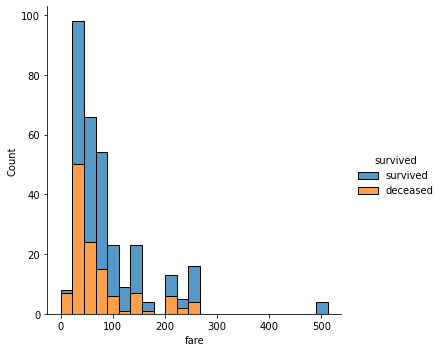

In [25]:
sns.displot(data = class1, kind = "hist", x = "fare", hue = "survived", multiple = "stack")

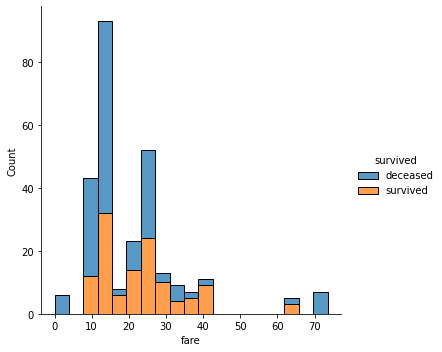

In [26]:
sns.displot(data = class2, kind = "hist", x = "fare", hue = "survived", multiple = "stack")

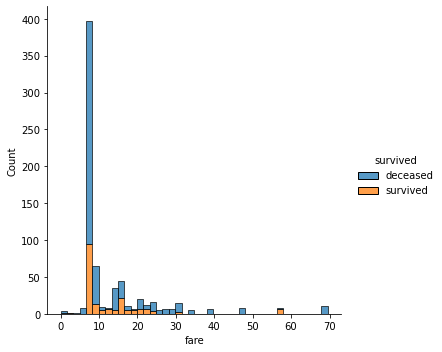

In [27]:
sns.displot(data = class3, kind = "hist", x = "fare", hue = "survived", multiple = "stack")

In [28]:
titanic.fare.mean()

33.29547928134572

Text(0.5, 1.0, 'Average Fare By Class')

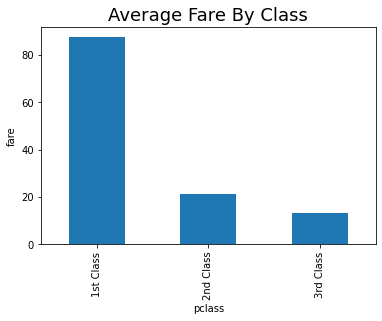

In [29]:
titanic.groupby("pclass")["fare"].mean().plot.bar(ylabel = "fare")
plt.xticks([0,1,2], ["1st Class", "2nd Class", "3rd Class"])
plt.title("Average Fare By Class", fontsize = 18)

In [34]:
titanic.sort_values("fare", ascending = False).head(10)
# Passengers with the 10 most expensive fares

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_class,famsize
183,1,survived,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,?,?,adult,0
302,1,survived,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,?,C,3,?,?,adult,0
49,1,survived,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,?,"Austria-Hungary / Germantown, Philadelphia, PA",adult,1
50,1,survived,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,?,"Germantown, Philadelphia, PA",adult,1
113,1,survived,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,10,?,"Winnipeg, MB",young adult,5
114,1,deceased,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,?,?,"Winnipeg, MB",teenager,5
115,1,deceased,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,?,?,"Winnipeg, MB",senior,5
116,1,survived,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S,10,?,"Winnipeg, MB",senior,5
111,1,survived,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,10,?,"Winnipeg, MB",young adult,5
112,1,survived,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S,10,?,"Winnipeg, MB",young adult,5


In [31]:
titanic[titanic["fare"] == 0]
# People who didn't pay to get on the Titanic (Perhaps Staff)
# Only 2 of 17 survived

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_class,famsize
7,1,deceased,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,?,?,"Belfast, NI",adult,0
70,1,deceased,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,?,S,?,?,"Liverpool, England / Belfast",senior,0
125,1,deceased,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,?,?,?,senior,0
150,1,deceased,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,?,110,?,adult,0
170,1,survived,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,C,?,Liverpool,adult,0
223,1,deceased,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,?,S,?,?,Belfast,senior,0
234,1,deceased,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,?,S,?,?,"Rotterdam, Netherlands",adult,0
363,2,deceased,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,?,S,?,?,Belfast,senior,0
384,2,deceased,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,?,S,?,?,Belfast,senior,0
410,2,deceased,"Frost, Mr. Anthony Wood 'Archie'",male,NaN,0,0,239854,0.0,?,S,?,?,Belfast,senior,0
